# Non Linear Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df=pd.read_csv(r"C:\Users\raghu\china_gdp.csv",encoding='iso-8859-1')

In [9]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [10]:
plt.figure(figsize=(5,5))
x,y = (df["Year"].values, df["Value"].values)


<Figure size 360x360 with 0 Axes>

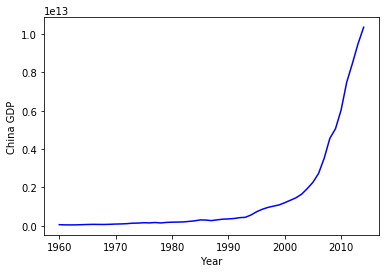

In [13]:
plt.plot(x,y,'b')
plt.ylabel('China GDP')
plt.xlabel('Year')
plt.show()

In [14]:
#it does not look like a linear regression.


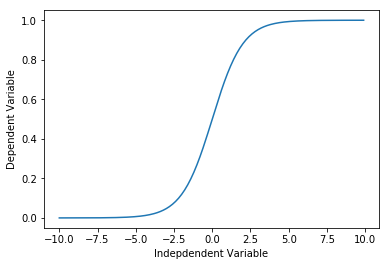

In [15]:
X = np.arange(-10.0, 10.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [16]:
#the graph similar to it.

In [17]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

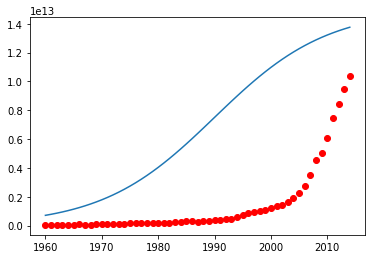

In [19]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x,Y_pred*15000000000000.)
plt.plot(x, y, 'ro')

**Our task here is to find the best parameters**

In [20]:
#lets normalize first

In [22]:
# Lets normalize our data
xdata =x/max(x)
ydata =y/max(y)

In [23]:
#getting optimized value for beta1 and beta2

In [24]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


In [25]:
#ploting resulting model

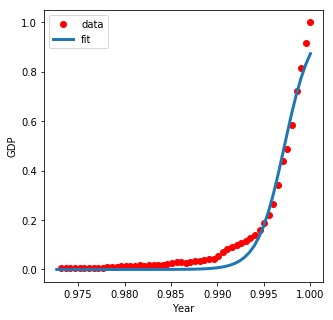

In [28]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(5,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

**Accuracy of the model:Non-linear-Regression**

In [32]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.75
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.91
